<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/LDA_QDA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Load data

In [0]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
train_labels = df_train.Histology

In [0]:
test_labels = df_test.Histology

##Z score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

#Visualize using LDA, data NON STAND

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

##Train data

In [0]:
lda = LinearDiscriminantAnalysis()
lda_result = lda.fit(train_data, train_labels)
train_data_lda = lda.transform(train_data)

In [0]:
train_data_lda.shape

(131, 2)

In [0]:
type(lda_result)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [0]:
df = pd.DataFrame(train_data_lda, columns=['lda_one', 'lda_two'])

In [0]:
df

,lda_one,lda_two
0,-3.735330,5.539015
1,-2.972100,3.896330
2,-4.492177,4.515088
3,-3.994613,4.380586
4,-2.207364,4.471812
...,...,...
126,2.270244,0.681552
127,2.862014,1.671285
128,4.186723,-2.234604
129,3.013112,0.917586


In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

Explained variation per principal component: [0.6450461 0.3549539]


La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

###Scatterplot Train data

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

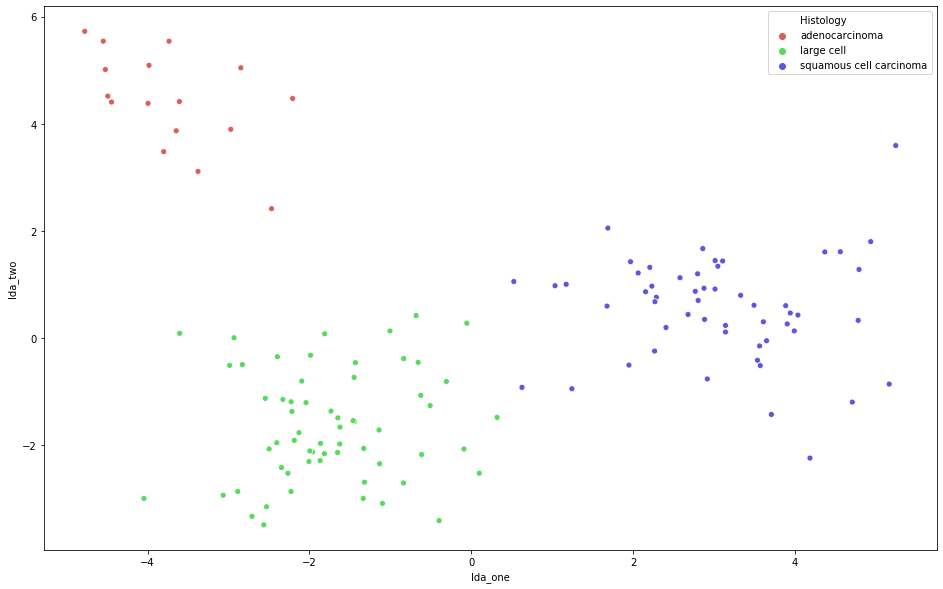

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.lda_one, y=df.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

##Test data

###Applicando il fit ottenuto per i dati di training per l'LDA

In [0]:
test_data_lda = lda.transform(test_data)

In [0]:
test_data_lda.shape

(34, 2)

In [0]:
type(lda_result)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [0]:
df = pd.DataFrame(test_data_lda, columns=['lda_one', 'lda_two'])

In [0]:
df

,lda_one,lda_two
0,-6.617918,-12.356202
1,-17.481509,-29.636207
2,5.195725,-11.079193
3,-7.040704,-3.841594
4,-8.105453,-1.624225
5,-6.545605,-41.762890
6,46.504103,-109.629628
7,-8.923523,-1.951316
8,-7.459192,-44.371672
9,97.797257,-244.922192


In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

Explained variation per principal component: [0.6450461 0.3549539]


La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

####Scatterplot Test data

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

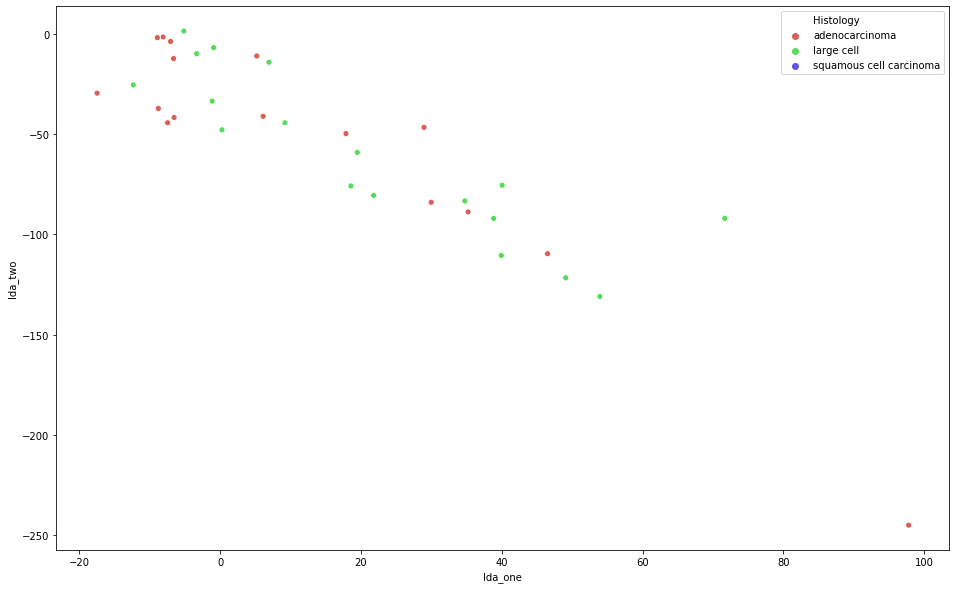

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.lda_one, y=df.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

###Facendo un nuovo fit con i dati di test

In [0]:
lda = LinearDiscriminantAnalysis()
lda_result = lda.fit(test_data, test_labels)
test_data_lda = lda.transform(test_data)

In [0]:
test_data_lda.shape

(34, 2)

In [0]:
type(lda_result)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [0]:
df = pd.DataFrame(test_data_lda, columns=['lda_one', 'lda_two'])

In [0]:
df.shape

(165, 2)

In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

Explained variation per principal component: [0.78911902 0.21088098]


La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

####Scatterplot Test data

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

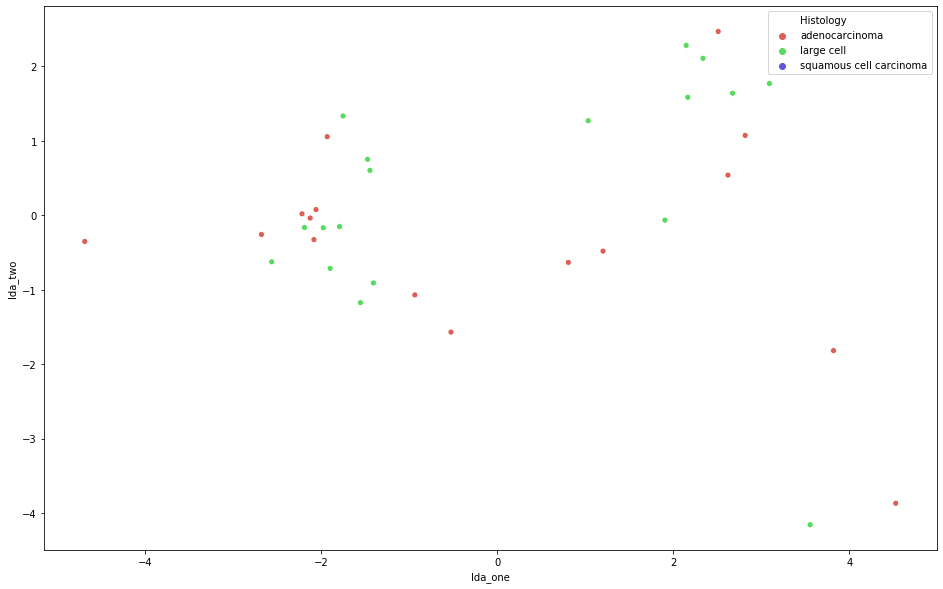

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.lda_one, y=df.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

In [0]:
list(df_test.Histology).count('adenocarcinoma')

20

In [0]:
list(df_test.Histology).count('large cell')

4

In [0]:
list(df_test.Histology).count('squamous cell carcinoma')

10

Non separa bene large cell da squamous cell carcinoma

#Visualize using LDA, data STAND

##Train data

In [0]:
lda = LinearDiscriminantAnalysis()
lda_result = lda.fit(train_data_stand, train_labels)
train_data_lda_stand = lda.transform(train_data_stand)

In [0]:
train_data_lda_stand.shape

(131, 2)

In [0]:
type(lda_result)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [0]:
df = pd.DataFrame(train_data_lda_stand, columns=['lda_one', 'lda_two'])

In [0]:
df

,lda_one,lda_two
0,-3.735330,5.539015
1,-2.972100,3.896330
2,-4.492177,4.515088
3,-3.994613,4.380586
4,-2.207364,4.471812
...,...,...
126,2.270244,0.681552
127,2.862014,1.671285
128,4.186723,-2.234604
129,3.013112,0.917586


In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

Explained variation per principal component: [0.6450461 0.3549539]


La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

###Scatterplot Train data

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

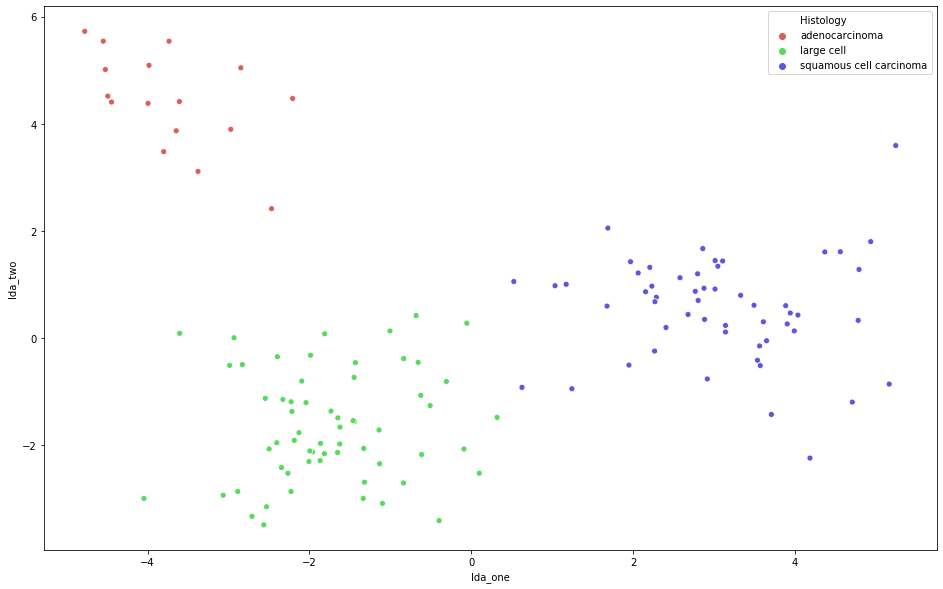

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.lda_one, y=df.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

##Test data

###Applicando il fit ottenuto per i dati di training per l'LDA

In [0]:
test_data_lda_stand = lda.transform(test_data_stand)

In [0]:
test_data_lda_stand.shape

(34, 2)

In [0]:
type(lda_result)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [0]:
df = pd.DataFrame(test_data_lda_stand, columns=['lda_one', 'lda_two'])

In [0]:
df

,lda_one,lda_two
0,-6.617918,-12.356202
1,-17.481509,-29.636207
2,5.195725,-11.079193
3,-7.040704,-3.841594
4,-8.105453,-1.624225
5,-6.545605,-41.762890
6,46.504103,-109.629628
7,-8.923523,-1.951316
8,-7.459192,-44.371672
9,97.797257,-244.922192


In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

Explained variation per principal component: [0.6450461 0.3549539]


La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

####Scatterplot Test data

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

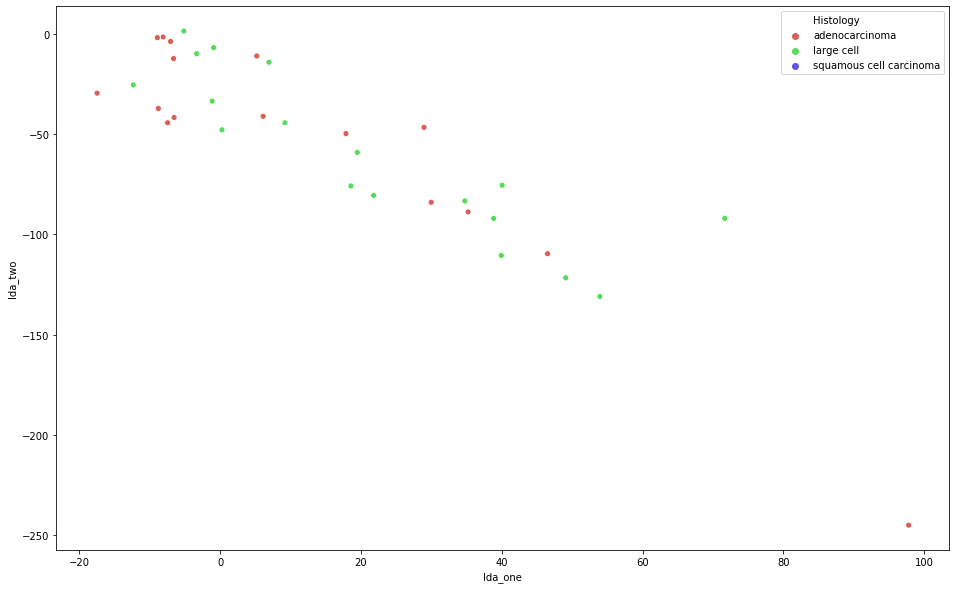

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.lda_one, y=df.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

###Facendo un nuovo fit con i dati di test

In [0]:
lda = LinearDiscriminantAnalysis()
lda_result = lda.fit(test_data_stand, test_labels)
test_data_lda_stand = lda.transform(test_data_stand)

In [0]:
test_data_lda_stand.shape

(34, 2)

In [0]:
type(lda_result)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [0]:
df = pd.DataFrame(test_data_lda_stand, columns=['lda_one', 'lda_two'])

In [0]:
df

,lda_one,lda_two
0,2.511875,2.468140
1,4.528617,-3.869207
2,3.821769,-1.819287
3,-2.055869,0.075532
4,0.809465,-0.633979
5,2.622924,0.538986
6,2.818325,1.071662
7,-0.522970,-1.570729
8,-2.079238,-0.328327
9,-2.676074,-0.258877


In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

Explained variation per principal component: [0.78911902 0.21088098]


La prima componente ha il 65% della varianza dell'intero dataset, la seconda il 35%

####Scatterplot Test data

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

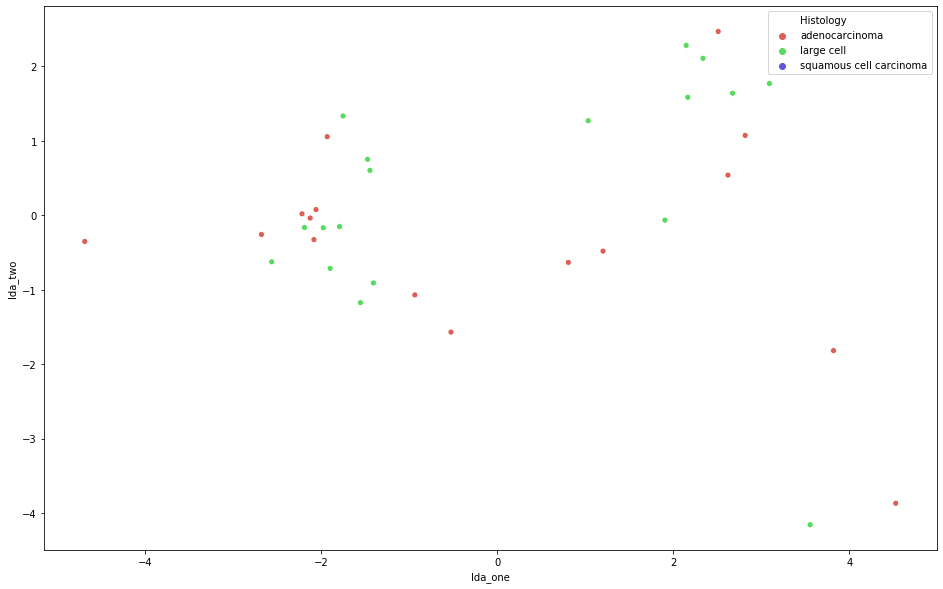

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.lda_one, y=df.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

Standardizzando i dati oppure no non cambia nulla

I dati del dataset di Test non si comportano bene come gli altri applicando la LDA,

#Merge dataset LDA

In [0]:
tot_data = pd.concat([train_data, test_data], axis=0)

In [0]:
tot_label = pd.concat([train_labels, test_labels], axis=0)

In [0]:
tot_data.shape

(165, 107)

In [0]:
tot_label.shape

(165,)

In [0]:
tot_data.head

<bound method NDFrame.head of       VoxelVolume  Maximum3DDiameter  ...  Contrast.1  Busyness
0    51905.377962          66.288317  ...    0.020920  1.306338
1    13432.502747          58.057539  ...    0.146173  0.253533
2    25843.872675          52.918217  ...    0.152919  0.611772
3    22152.709032          46.635312  ...    0.351327  0.564313
4   119385.805617          92.436320  ...    0.132602  1.804351
..            ...                ...  ...         ...       ...
29    6592.266962          33.622119  ...    0.085026  0.359230
30    3010.031479          29.286452  ...    0.295357  0.263438
31    8683.195759          49.195074  ...    0.594629  0.392208
32   25939.914844          57.067095  ...    0.059377  0.658985
33   73401.852784          73.105484  ...    0.064501  0.895047

[165 rows x 107 columns]>

In [0]:
tot_label.head

<bound method NDFrame.head of 0              adenocarcinoma
1              adenocarcinoma
2              adenocarcinoma
3              adenocarcinoma
4              adenocarcinoma
               ...           
29    squamous cell carcinoma
30             adenocarcinoma
31             adenocarcinoma
32    squamous cell carcinoma
33    squamous cell carcinoma
Name: Histology, Length: 165, dtype: object>

In [0]:
lda = LinearDiscriminantAnalysis()
lda_result = lda.fit(tot_data, tot_label)
tot_data_lda = lda.transform(tot_data)

In [0]:
tot_data_lda.shape

(165, 2)

In [0]:
df = pd.DataFrame(tot_data_lda, columns=['lda_one', 'lda_two'])

In [0]:
df

,lda_one,lda_two
0,-4.260697,2.389092
1,-1.137078,-1.051931
2,-1.763563,-0.177532
3,-2.974372,0.180177
4,-1.801073,2.834989
...,...,...
160,-0.574320,1.891125
161,-4.169638,0.751516
162,-3.549652,0.858156
163,2.103693,0.863202


In [0]:
print('Explained variation per principal component: {}'.format(lda.explained_variance_ratio_))

Explained variation per principal component: [0.57550443 0.42449557]


###Scatterplot Tot data

Creiamo uno scatter plot della prima e della seconda componente principale, usiamo colori diversi per le diverse istologie.

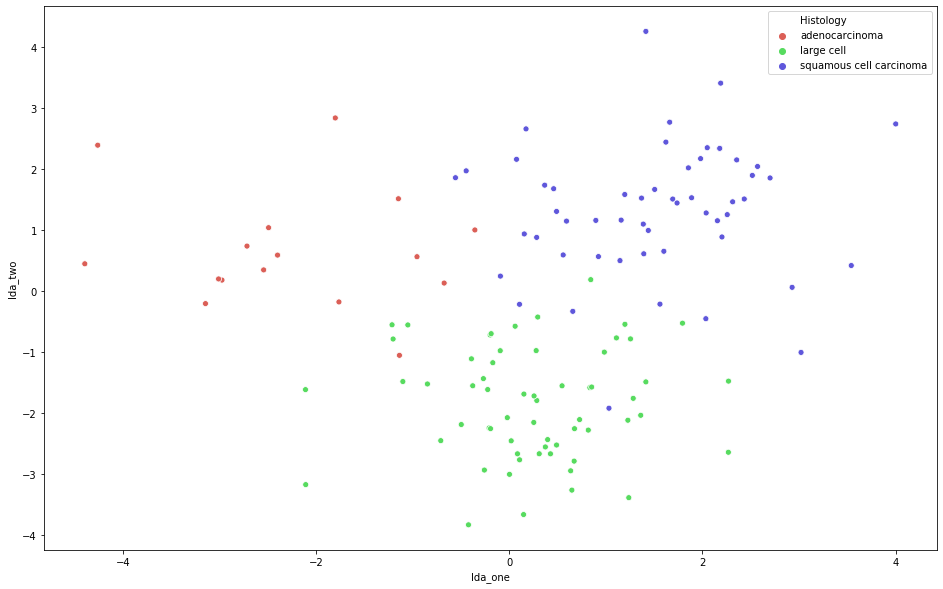

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.lda_one, y=df.lda_two, hue=train_labels, 
                palette=sns.color_palette('hls', 3), legend='full')

In [0]:
n_train_a = list(df_train.Histology).count('adenocarcinoma')
n_train_l = list(df_train.Histology).count('large cell')
n_train_s = list(df_train.Histology).count('squamous cell carcinoma')
n_test_a = list(df_test.Histology).count('adenocarcinoma')
n_test_l = list(df_test.Histology).count('large cell')
n_test_s = list(df_test.Histology).count('squamous cell carcinoma')

In [0]:
n_tot_a = n_train_a + n_test_a
n_tot_l = n_train_l + n_test_l
n_tot_s = n_train_s + n_test_s

In [0]:
n_tot_a

36

In [0]:
n_tot_l

65

In [0]:
n_tot_s

64

In [0]:
64+65+36

165

In [0]:
train_data.shape

(131, 107)

In [0]:
test_data.shape

(34, 107)

In [0]:
131+34

165

In [0]:
n_train_a

16

In [0]:
n_train_l

61

In [0]:
n_train_s

54

In [0]:
54+61+16

131

In [0]:
n_test_a

20

In [0]:
n_test_l

4

In [0]:
n_test_s

10